# Logistic Regression with Python

For this Project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



---

# **Titanic Dataset – Column Definitions **

### **1. PassengerId**

A unique ID number assigned to each passenger (just for identification).

### **2. Survived**

Whether the passenger survived the Titanic disaster.

* `0` = Did **not** survive
* `1` = **Survived**

### **3. Pclass**

Passenger’s **ticket class** (a proxy for socio-economic status):

* `1` = First class (richest)
* `2` = Second class
* `3` = Third class (lowest class)

### **4. Name**

The full name of the passenger, including title (Mr., Mrs., Miss, etc.).

### **5. Sex**

Passenger’s gender (`male` or `female`).

### **6. Age**

Passenger’s age in years.
(Some values are missing → unknown age.)

### **7. SibSp**

Number of **siblings** or **spouses** the passenger had onboard.
Examples:

* 1 sister + 1 brother → **2**
* Traveling with husband → **1**

### **8. Parch**

Number of **parents** or **children** the passenger had onboard.
Examples:

* Traveling with mom → **1**
* Traveling with both parents + 1 child → **3**

### **9. Ticket**

Ticket number the passenger used to board the ship.

### **10. Fare**

Amount of money the passenger paid for the ticket.

### **11. Cabin**

Cabin number assigned to the passenger.
Many values are missing (most passengers didn’t have cabins assigned).

### **12. Embarked**

Port where the passenger boarded the Titanic:

* `C` = Cherbourg
* `Q` = Queenstown
* `S` = Southampton

---


In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

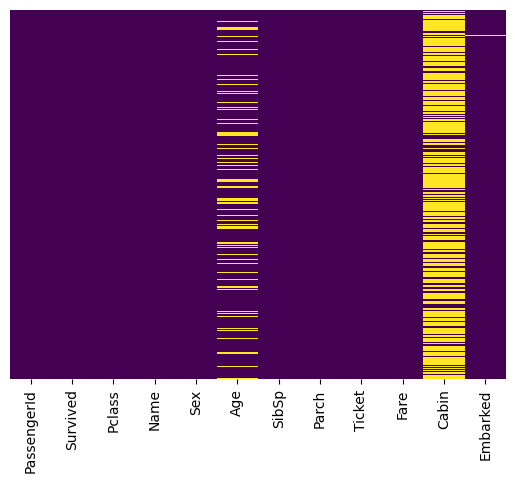

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<Axes: xlabel='Survived', ylabel='count'>

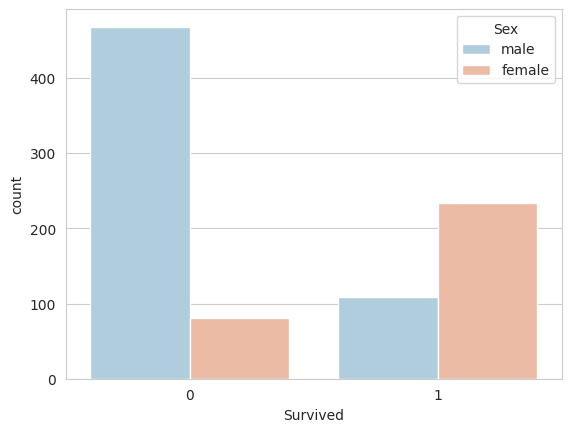

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

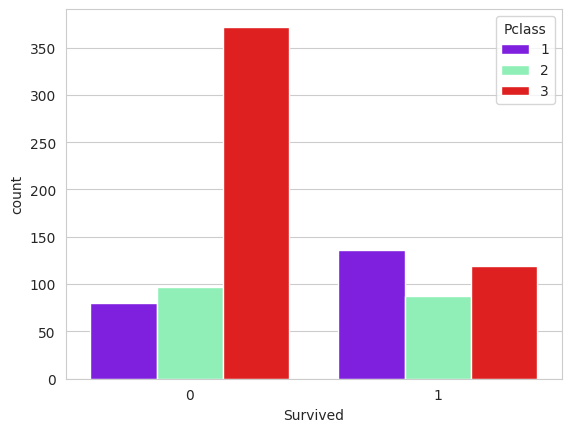

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: xlabel='Age', ylabel='Count'>

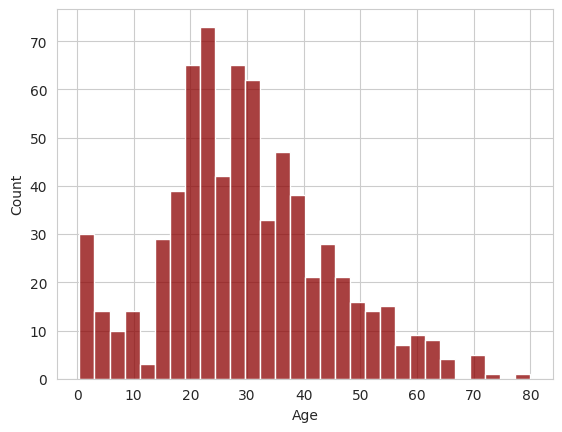

In [10]:
sns.histplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

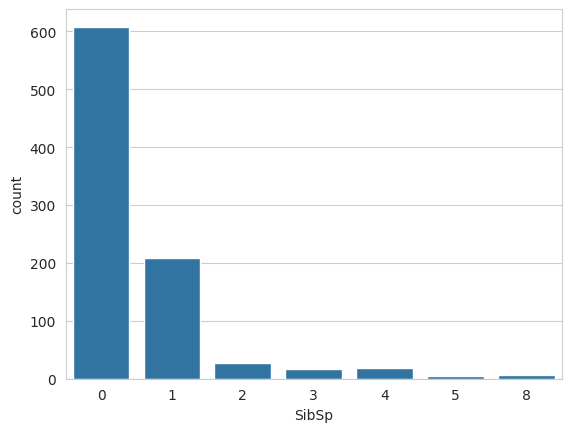

In [12]:
sns.countplot(x='SibSp',data=train)

<Axes: >

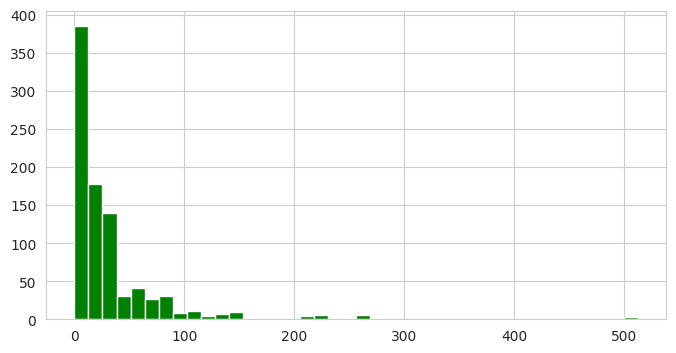

In [14]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<Axes: xlabel='Pclass', ylabel='Age'>

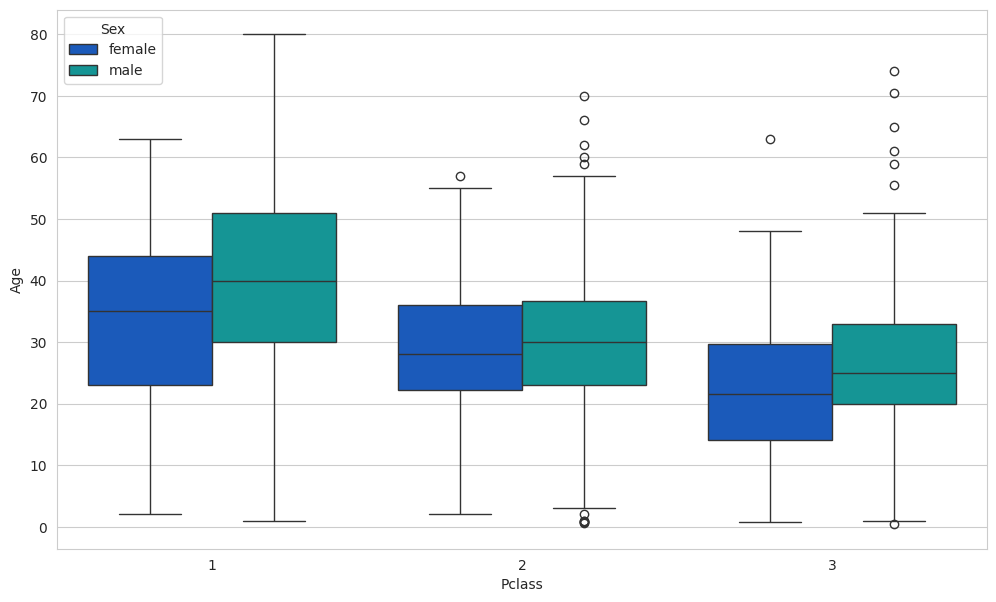

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',hue='Sex', data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<Axes: >

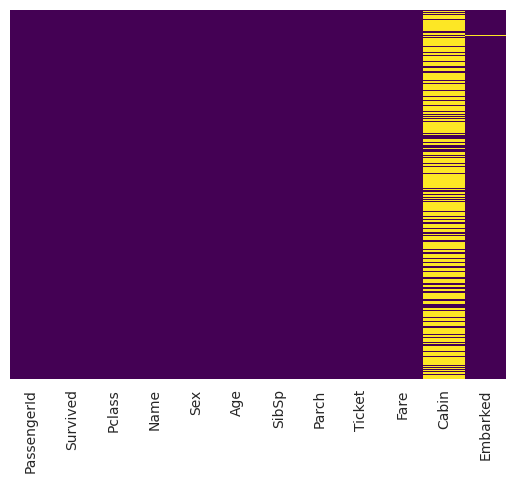

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [20]:
train.drop('Cabin',axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [26]:
train = pd.concat([train,sex,embark],axis=1)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [45]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.019314,13.209814,0.42,22.0000,26.0000,36.5,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [51]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=500)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [58]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!


---

# **Classification Evaluation Metrics**

In classification problems, we compare the model’s predictions with the true labels using metrics such as **Precision**, **Recall**, and **F1-score**.

These metrics come from the **confusion matrix**:

|                     | Predicted Positive      | Predicted Negative      |
| ------------------- | ----------------------- | ----------------------- |
| **Actual Positive** | **True Positive (TP)**  | **False Negative (FN)** |
| **Actual Negative** | **False Positive (FP)** | **True Negative (TN)**  |

---

# **Definitions of TP, FP, FN, TN**

### **True Positive (TP)**

Cases where the model **correctly predicted Positive**.
Example: model says “disease” and the person actually has the disease.

### **False Positive (FP)**

Cases where the model **predicted Positive**, but the actual class was Negative.
Example: model says “spam”, but the email is actually normal.
(Also called **Type I Error**.)

### **False Negative (FN)**

Cases where the model **predicted Negative**, but the actual class was Positive.
Example: model says “no disease”, but the person is actually sick.
(Also called **Type II Error**.)

### **True Negative (TN)**

Cases where the model **correctly predicted Negative**.
Example: model says “not spam”, and the email is indeed not spam.

---

# **1. Precision**

**Precision** tells us:

> “Out of all the predictions the model said were *positive*, how many were actually positive?”

It measures the **accuracy of positive predictions**.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$


* High precision = very few **false positives**
* Useful when **false positives are costly**
  (e.g., spam detection → don’t mark real emails as spam)

---

# **2. Recall (Sensitivity / True Positive Rate)**

**Recall** tells us:

> “Out of all the actual positive cases, how many did the model correctly identify?”

It measures the model’s ability to **find all positive cases**.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$


* High recall = very few **false negatives**
* Useful when **missing a positive is costly**
  (e.g., disease detection → do not miss sick patients)

---

# **3. F1-Score**

**F1-score** is the **harmonic mean** of Precision and Recall.

It balances both metrics, giving a single score that considers both **false positives** and **false negatives**.

$$
\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

* High F1-score = good balance between precision and recall
* Most useful when:

  * Classes are **imbalanced**
  * You care about both catching positives **and** not raising false alarms

---

# **4. Support**

**Support** is simply:

> “How many actual samples of this class exist in the dataset?”

It does *not* measure performance; it only tells you the number of true samples.

$$
\text{Support} = \text{Number of actual instances of each class}
$$


Support helps you evaluate:

* class imbalance
* how reliable the metrics are (small support → unstable or misleading values)

---

# **Summary of Interpretation**

| Metric        | Measures                        | Good When                   | Bad When                                 |
| ------------- | ------------------------------- | --------------------------- | ---------------------------------------- |
| **Precision** | Quality of positive predictions | False positives must be low | Model misses many positives              |
| **Recall**    | Ability to find all positives   | False negatives must be low | Too many false positives                 |
| **F1-Score**  | Balance of Prec. & Recall       | Need one combined score     | Classes balanced & accuracy is preferred |
| **Support**   | Count of true samples           | Check class imbalance       | Not a measure of accuracy                |

---

# **Simple Example**

If you see:

```
precision    recall  f1-score   support
0       0.88      0.95      0.91       500
1       0.83      0.70      0.76       100
```

Explaination:

* Class **0** is easier → more data (support = 500)
* Class **1** is harder → low recall (model misses positives)
* F1-score is lower for class 1 → poor performance on minority class

---


# **Conclusions for the Example**

### **1. The model performs well on Class 0 but struggles with Class 1.**

High recall for Class 0 (0.95) means it correctly identifies most negatives,
but recall for Class 1 (0.70) shows it misses many positives (**high FN**).

---

### **2. Class imbalance is affecting the model.**

* Support = 500 for Class 0
* Support = 100 for Class 1

The model has learned Class 0 better simply because it has more examples.
This is very common in real datasets.

---

### **3. The model is not reliable for detecting Class 1.**

F1-score is only **0.76** for Class 1, indicating the model:

* makes many mistakes when predicting this class
* is not balancing precision and recall well

* If Class 1 is the *important* class (e.g., “disease present”), this is a problem.
---


In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



---

# **Why Accuracy Is Not Enough for Classification**

**Accuracy** measures how often the model is correct:

$$
\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
$$

But accuracy can be **misleading**, especially in real-world classification problems.

---

## **1. Fails on Imbalanced Datasets**

If one class is much more common, accuracy becomes meaningless.

**Example:**

* 95% class 0
* 5% class 1

A model predicting **all zeros** gets **95% accuracy**,
but **detects zero positives** → useless model.

---

## **2. Does Not Show *What* the Model Gets Wrong**

Accuracy hides:

* False Positives (FP)
* False Negatives (FN)
* Class imbalance
* Model bias toward majority class

Two models can have the same accuracy but very different mistake patterns.

---

## **3. Different Errors Have Different Costs**

In many applications:

* Missing a positive case (FN) is worse than a false alarm (FP)
  *e.g., disease detection, fraud detection.*

Accuracy treats every error the same → not realistic.

---

## **4. No Class-wise Insight**

Accuracy gives **one number**, but real evaluation requires:

* Precision
* Recall
* F1-Score
* Support
* Confusion Matrix

These metrics show performance **per class**, which accuracy cannot.

---

# **Summary**

* Accuracy alone is **not reliable**, especially with imbalanced data.
* It hides FP/FN and gives no insight into class-wise performance.
* Always use **Precision, Recall, F1-Score, and Support** for proper evaluation.

---
